# Spitfire Example: unsteady flamelet extinction trajectory

In [11]:
import matplotlib.pyplot as plt
from spitfire import ChemicalMechanismSpec, Flamelet
from spitfire.chemistry.analysis import explosive_mode_analysis

In [12]:
mechanism = ChemicalMechanismSpec(cantera_xml='methane-lu30.xml', group_name='methane-lu30')

In [13]:
pressure = 101325.

air = mechanism.stream(stp_air=True)
air.TP = 300., pressure

fuel = mechanism.stream('TPX', (300., pressure, 'CH4:1'))

flamelet_specs = {'mech_spec': mechanism,
                  'pressure': pressure,
                  'initial_condition': 'equilibrium',
                  'oxy_stream': air,
                  'fuel_stream': fuel,
                  'stoich_dissipation_rate': 1e3,
                  'grid_points': 64,
                  'grid_type': 'clustered',
                  'include_enthalpy_flux': True,
                  'include_variable_cp': True}

In [14]:
f = Flamelet(**flamelet_specs)

In [15]:
output = f.integrate_to_steady(write_log=True, log_rate=30)


 2020-03-27 21:29 : Spitfire running case with method: ESDIRK64

|number of  | simulation | time step  | diff. eqn. | total cpu  | cput per |
|time steps | time (s)   | size (s)   | |residual| | time (s)   | step (ms)|
---------------------------------------------------------------------------|
| 30        | 1.56e-06   | 3.00e-08   | 7.44e+05   | 6.12e-01   | 2.04e+01 |
| 60        | 3.15e-06   | 7.41e-08   | 4.92e+05   | 1.23e+00   | 2.06e+01 |
| 90        | 5.99e-06   | 1.26e-07   | 3.32e+05   | 1.85e+00   | 2.05e+01 |
| 120       | 9.46e-06   | 8.43e-08   | 2.48e+05   | 2.46e+00   | 2.05e+01 |
| 150       | 1.20e-05   | 1.68e-07   | 2.09e+05   | 3.06e+00   | 2.04e+01 |
| 180       | 2.19e-05   | 4.10e-07   | 1.23e+05   | 3.78e+00   | 2.10e+01 |
| 210       | 3.70e-05   | 6.03e-07   | 6.14e+04   | 4.51e+00   | 2.15e+01 |
| 240       | 5.95e-05   | 9.15e-07   | 2.40e+04   | 5.23e+00   | 2.18e+01 |
| 270       | 9.55e-05   | 1.54e-06   | 5.36e+03   | 5.96e+00   | 2.21e+01 |
----------

<IPython.core.display.Javascript object>


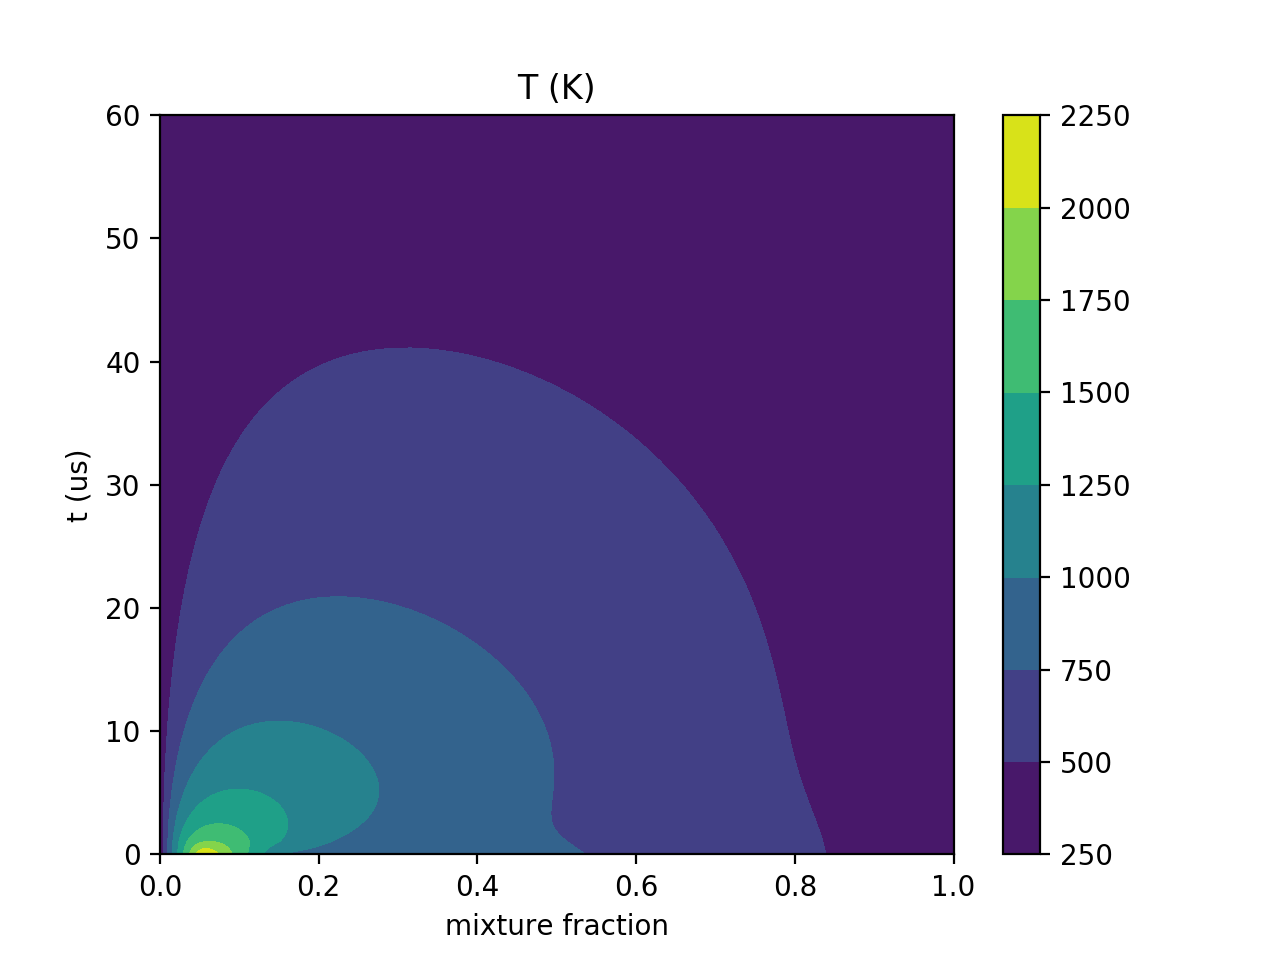

In [16]:
%matplotlib notebook
plt.contourf(output.mixture_fraction_grid,
             output.time_grid * 1.e6,
             output['temperature'])
plt.ylabel('t (us)')
plt.xlabel('mixture fraction')
plt.ylim([0, 60])
plt.colorbar()
plt.title('T (K)')
plt.show()

<IPython.core.display.Javascript object>


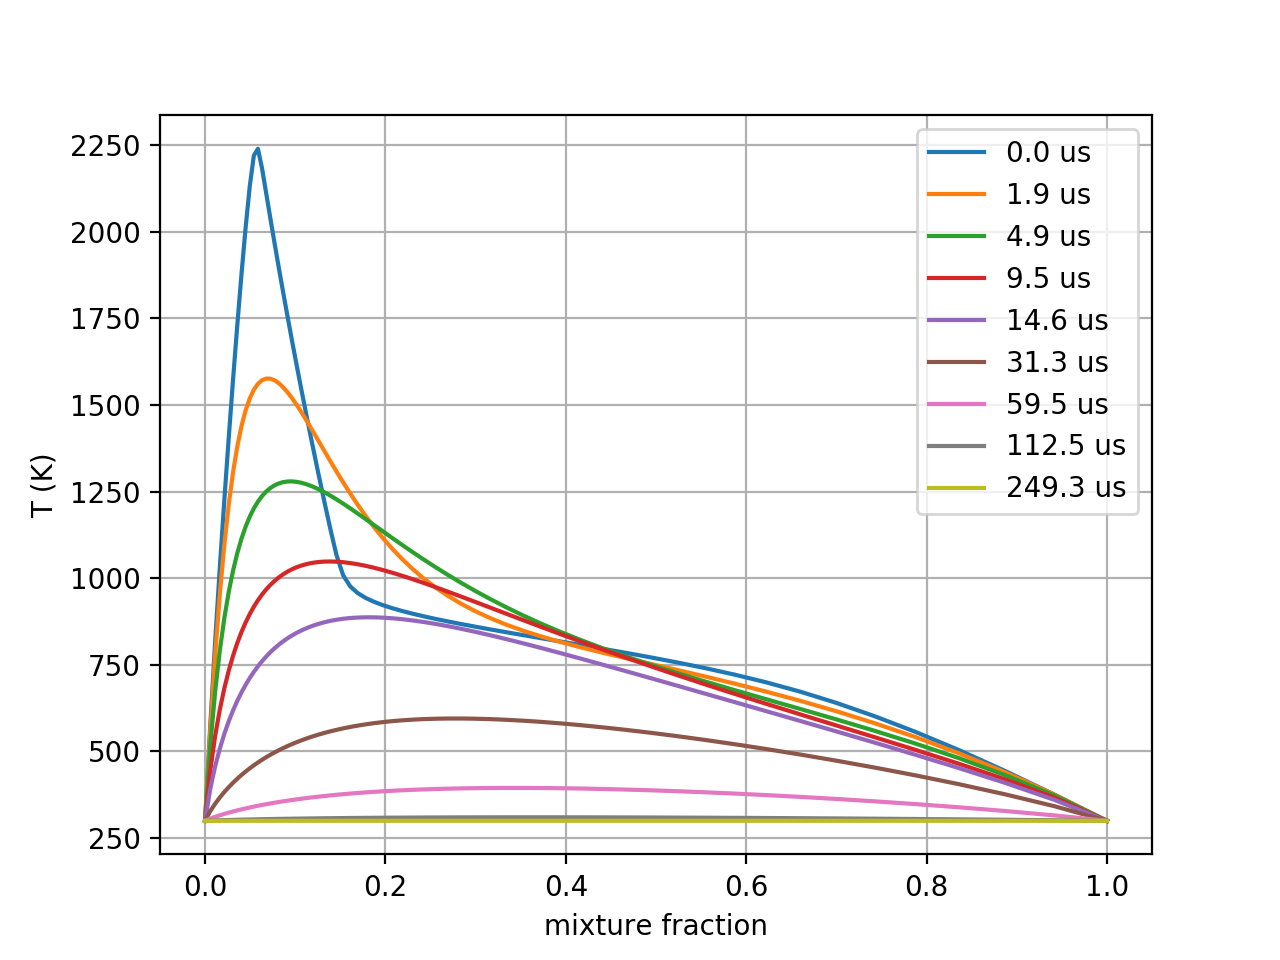

In [17]:
%matplotlib notebook
for it in range(0, output.time_npts, 40):
    plt.plot(output.mixture_fraction_values,
             output['temperature'][it, :].T,
             label=f'{output.time_values[it]*1.e6:.1f} us')
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.legend(loc='best')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


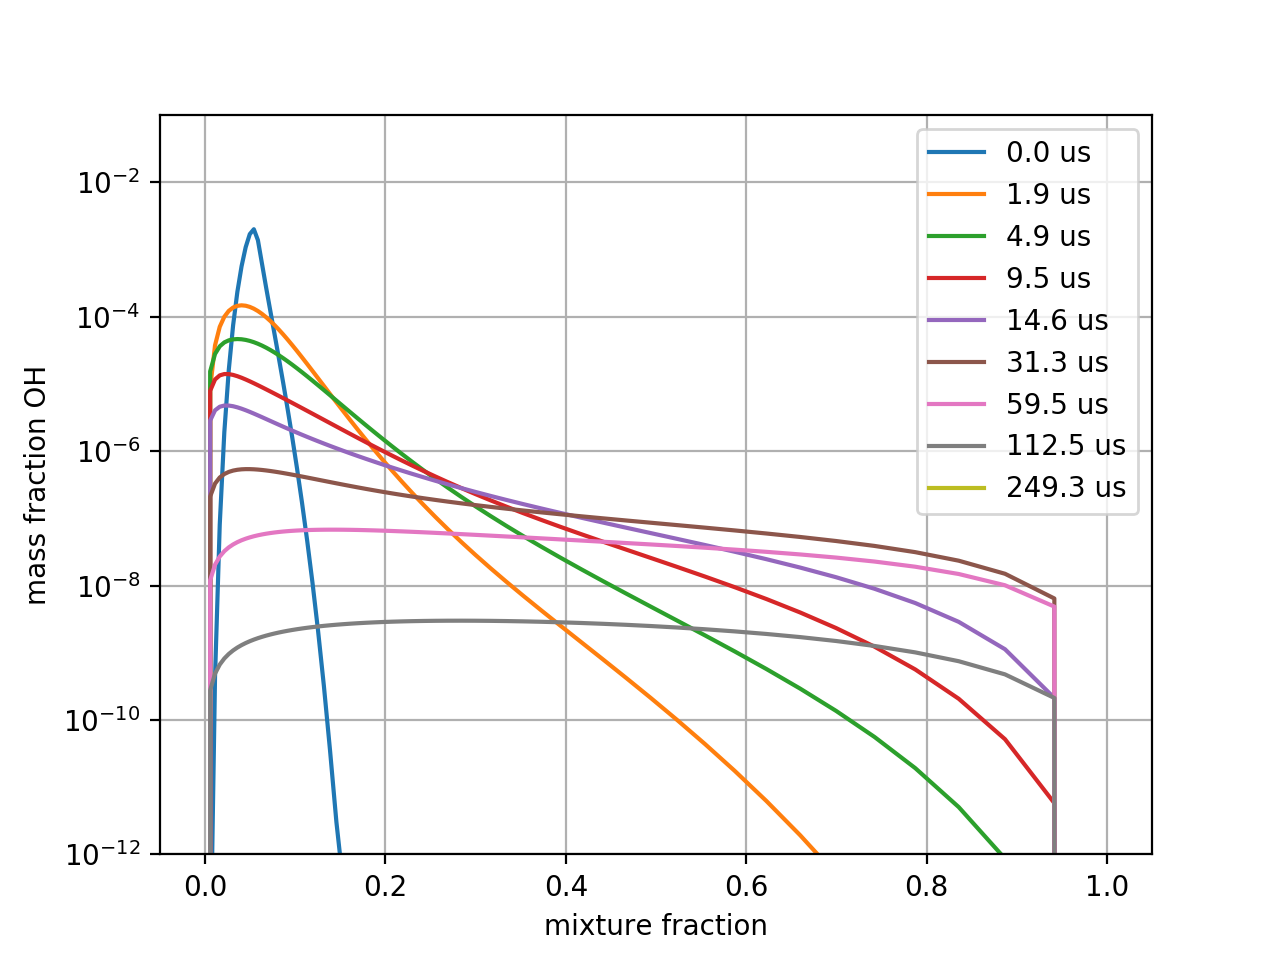

In [18]:
%matplotlib notebook
for it in range(0, output.time_npts, 40):
    plt.plot(output.mixture_fraction_values,
             output['mass fraction OH'][it, :].T,
             label=f'{output.time_values[it]*1.e6:.1f} us')
plt.ylabel('mass fraction OH')
plt.xlabel('mixture fraction')
plt.yscale('log')
plt.ylim([1e-12, 1e-1])
plt.legend(loc='best')
plt.grid()
plt.show()